In [21]:
%matplotlib inline

# 导入module
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [22]:
#导入数据  对文件的读取操作
pickle_file='notMNIST.pickle'
with open(pickle_file,'rb') as f:
    pickle_data=pickle.load(f)
    train_features=pickle_data['train_features']
    train_labels=pickle_data['train_labels']
    valid_features=pickle_data['valid_features']
    valid_labels=pickle_data['valid_labels']
    test_features=pickle_data['test_features']
    test_labels=pickle_data['test_labels']
    del pickle_data

In [23]:
#初始化参数扁平化为向量
features_count=28*28
labels_count=10

#占位张量
features=tf.placeholder(tf.float32)
labels=tf.placeholder(tf.float32)
#变量张量
weights=tf.Variable(tf.truncated_normal((features_count,labels_count)))
biases=tf.Variable(tf.zeros(labels_count))

In [24]:
#其实就相当于前面写的函数  一样一样的
#构建模型  XW+b
logits=tf.matmul(features,weights)+biases#150000*784 x  784*10 = 150000*10
prediction=tf.nn.softmax(logits)#150000*10

#按行求和  
cross_entropy= -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1) #150000*10  点乘  150000*10  行对行  列对列 然后按行求和
#求取loss
loss=tf.reduce_mean(cross_entropy)

In [25]:
#初始化所有变量
init=tf.global_variables_initializer()

In [26]:
#提前写好  
train_feed_dict={features:train_features,labels:train_labels}
valid_feed_dict={features:valid_features,labels:valid_labels}
test_feed_dict={features:test_features,labels:test_labels}


In [27]:
#返回的是vector中的最大值的索引号，
#如果vector是一个向量，那就返回一个值，
#如果是一个矩阵，那就返回一个向量，这个向量的每一个维度都是相对应矩阵行的最大值元素的索引号
#检查正确性的变量
correct_prediction=tf.equal(tf.argmax(prediction,1),tf.argmax(labels,1))
#计算准确度的变量
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [28]:
#寻找最合适的参数，训练次数和学习率
epoches=20
learn_rate=0.005
#每次的训练量
batch_size=128
#梯度下降
optimizer=tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)
#交叉验证的准确度
validation_accuracy=0.0

In [29]:
#变量
log_batch_step=50
batches=[]
loss_batch=[]
train_acc_batch=[]
valid_acc_batch=[]

In [30]:
#开始训练
with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))#将整个样本分割成150000/128个部分1100个子集

    for epoch_i in range(epoches):
        
        # 进度条
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epoches), unit='batches')
        
        # 开始训练
        for batch_i in batches_pbar: 
            
            #每个数据集的大小及前后标
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]


            op, l = session.run([optimizer, loss],feed_dict={features: batch_features, labels: batch_labels})

            
            #每50个数据记录一次
            if not batch_i % log_batch_step:
                # 训练集和验证集
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict) 
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict) #

                # 记录损失和精度
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l) 
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)


Epoch 20/20: 100%|████████████████████████████████████████████████████████████| 1114/1114 [00:13<00:00, 81.51batches/s]


In [34]:
print(valid_acc_batch[-10:])

[0.7384, 0.7377333, 0.7385333, 0.73946667, 0.738, 0.73786664, 0.7385333, 0.73906666, 0.73866665, 0.73786664]


In [35]:
#使用测试集进行检验  跟上面的一样   
test_accuracy = 0.0
with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epoches):
        
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epoches), unit='batches')
        
        for batch_i in batches_pbar: 
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            op, l = session.run([optimizer, loss],feed_dict={features: batch_features, labels: batch_labels})

            if not batch_i % log_batch_step:
                test_accuracy = session.run(accuracy, feed_dict=test_feed_dict) 

                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                


        test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)
        print(test_accuracy)





Epoch  1/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 520.38batches/s]


0.3936


Epoch  2/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 537.06batches/s]


0.5618


Epoch  3/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:01<00:00, 565.17batches/s]


0.659


Epoch  4/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:01<00:00, 557.17batches/s]


0.7037


Epoch  5/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:01<00:00, 563.75batches/s]


0.7329


Epoch  6/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 449.29batches/s]


0.7504


Epoch  7/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 546.86batches/s]


0.7634


Epoch  8/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 544.48batches/s]


0.7722


Epoch  9/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 446.07batches/s]


0.7806


Epoch 10/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 534.75batches/s]


0.7874


Epoch 11/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 548.60batches/s]


0.7938


Epoch 12/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 515.72batches/s]


0.799


Epoch 13/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 484.05batches/s]


0.8034


Epoch 14/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 483.52batches/s]


0.806


Epoch 15/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 541.85batches/s]


0.8086


Epoch 16/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 399.50batches/s]


0.8113


Epoch 17/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:03<00:00, 329.66batches/s]


0.8142


Epoch 18/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 380.61batches/s]


0.8153


Epoch 19/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 514.42batches/s]


0.817


Epoch 20/20: 100%|███████████████████████████████████████████████████████████| 1114/1114 [00:02<00:00, 494.27batches/s]


0.8181


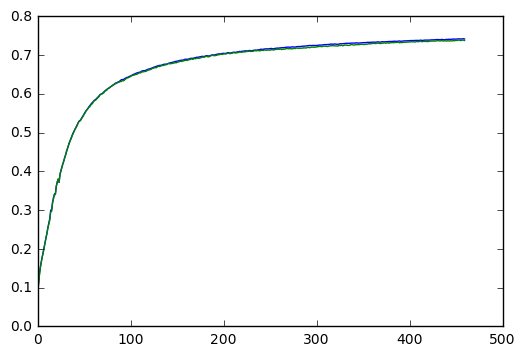

In [40]:
plt.plot(train_acc_batch)
plt.plot(valid_acc_batch)
plt.show()

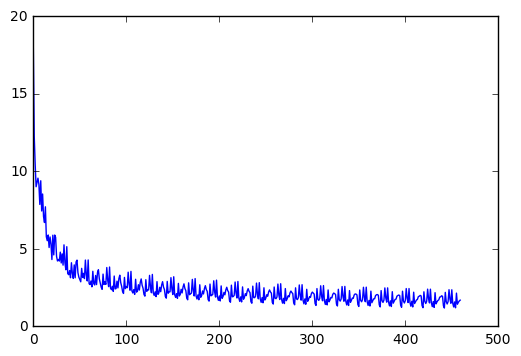

In [43]:
plt.plot(loss_batch)
plt.show()